# Blue Book for Bulldozers

Predicting the sell prize of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project
with the goal of predicting the sale price of bulldozers

# 1. Problem definition
> How well ca we predict the future sale price of a bulldozer , given
its characteristics and previous examples of how much similar bulldozers have been
sold for

# 2.Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition
The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 -
April 30, 2012 You make predictions on this set throughout the majority of
the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of
the competition. It contains data from May 1, 2012 - November 2012.
Your score on the test set determines your final rank for the competition.
The key fields are in train.csv are:

SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

There are several fields towards the end of the file on the different
options a machine can have.  The descriptions all start with "machine
configuration" in the data dictionary.  Some product types do not have
a particular option, so all the records for that option variable will be
null for that product type.  Also, some sources do not provide good option and/or hours data.
The machine_appendix.csv file contains the correct year manufactured
for a given machine along with the make, model, and product class details.
There is one machine id for every machine in all the competition datasets (training, evaluation, etc.).

Link >>>> https://www.kaggle.com/c/bluebook-for-bulldozers/data

# 3. The evaluation metric for this competition is the RMSLE (root mean squared log error)
between the actual and predicted auction prices

For more on the evaluation of this project check:
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For
example our goal for this project will be to build a machine learning model which will
minimises RMSLE

# 4. Features
Kaggle provides a data dictionary detailing all the features of the dataset. You can view the data
On >>>> Features data dictionary below

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# >>> Features data dictionary
data_dictionary = pd.read_csv("./data/Data Dictionary.csv")
data_dictionary

,Variable,Description,Unnamed: 2
0,SalesID,unique identifier of a particular sale of a ...,NaN
1,MachineID,identifier for a particular machine; machin...,NaN
2,ModelID,identifier for a unique machine model (i.e. ...,NaN
3,datasource,source of the sale record; some sources are...,NaN
4,auctioneerID,"identifier of a particular auctioneer, i.e. ...",NaN
5,YearMade,year of manufacturer of the Machine,NaN
6,MachineHoursCurrentMeter,current usage of the machine in hours at tim...,NaN
7,UsageBand,"value (low, medium, high) calculated compari...",NaN
8,Saledate,time of sale,NaN
9,Saleprice,cost of sale in USD,NaN


In [3]:
# Import training and Validation sets
df = pd.read_csv("./data/TrainAndValid.csv",low_memory=False)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
# Check NA's
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
# Columns list
list(df)

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'saledate',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

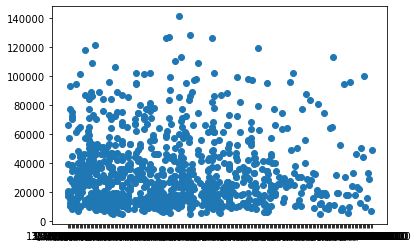

In [7]:
# Visualization
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.show()


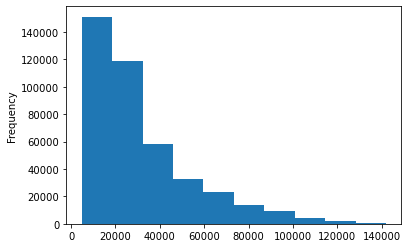

In [8]:
# Check the price distribution using an Histogram
df["SalePrice"].plot.hist()
plt.show()

### Parsing dates
When we work with time series date, we want to enrich the time & date
component as much as possible
We can do that by telling pandas which of our columns has dates in it using
parse_date

In [9]:
# Import data again but this time parse dates
df = pd.read_csv("./data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [10]:
# Check Datatypes
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [11]:
#  Check Saledata datatype
df["saledate"].dtypes

dtype('<M8[ns]')

### Sort DataFrame by saledates
When working with Timeseries date its a good idea to sort it by date


In [12]:
# Sort DataFrame in data order
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df['saledate'].head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the DataFrame

We are making a copy just in case we make any mistakes

In [13]:
# Making a copy of the data

df_tmp = df.copy()

### Now we can start doing Preprocessing of the data.

* We can add new features using the saledate , such as year, month , day etc.
* We also have to address the missing values

In [14]:
# Let's check the data column
df_tmp["saledate"][:5]



205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [15]:
# Check for Missing values
df_tmp["saledate"].isna().sum()



0

In [16]:
# Now we can add the new date features that may be helpful to the model
### Add datatime parameter for saledate
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html
# dt help to access datetime
df_tmp["saleYear"] = df_tmp["saledate"].dt.year
df

df_tmp["saleMonth"] = df_tmp["saledate"].dt.month
df_tmp["saleMonth"]

df_tmp["saleDay"] = df_tmp["saledate"].dt.day
df_tmp["saleDay"]

df_tmp["saleDayOfWeek"] = df_tmp["saledate"].dt.dayofweek
df_tmp["saleDayOfWeek"]

df_tmp["saleDayOfYear"] = df_tmp["saledate"].dt.dayofyear
df_tmp["saleDayOfYear"]



205615     17
274835     31
141296     31
212552     31
62755      31
         ... 
410879    119
412476    119
411927    119
407124    119
409203    119
Name: saleDayOfYear, Length: 412698, dtype: int64

## Now we can start to deal with the missing values

Let's check the data


In [17]:
# checking missing values
df_tmp.isna().sum()


SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [18]:
# Checking the missing values ratio / percentage
df_tmp.isna().sum()/len(df_tmp)



SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

# We have a lot of missing values

So are columns such as `"Pushblock"` as about 93% missing values

We have missing values from:
* Categorical/ String columns
* Numerical Columns

All these will be addressed using different method.

## Addressing String/ Categorical columns Missing values

But we have a challenge this is a big data with more then 50 columns.

How can we identify the columns which are String or numerical

* We can check different data types with pandas's `pd.api.types`
Link: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html


In [19]:
# Find the columns which contain strings
list_str_columns = []
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        list_str_columns.append(label)

# List
print("List od string: ",len(list_str_columns))



UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
List od string:  44


In [20]:
# Now we know we have 44 string columns
# We can check for missing values
df_tmp[list_str_columns].isna().sum()


UsageBand                  339028
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc            140727
fiModelSeries              354031
fiModelDescriptor          337882
ProductSize                216605
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System               305611
Enclosure                     334
Forks                      214983
Pad_Type                   331602
Ride_Control               259970
Stick                      331602
Transmission               224691
Turbocharged               331602
Blade_Extension            386715
Blade_Width                386715
Enclosure_Type             386715
Engine_Horsepower          386715
Hydraulics                  82565
Pushblock                  386715
Ripper                     305753
Scarifier                  386704
Tip_Control                386715
Tire_Size                  315060
Coupler       

# Now Let's deal with the string columns missing values

* For this project we are just going to assign `"missing"` to all the missing values in the strings columns
* The convert the values to categories using `astype("category")`

In [21]:
# let the check the info() first for reference
df_tmp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

In [22]:
# We are going to address the missing values
# Then convert the columns to category
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        # Addressing the missing
        df_tmp[label].fillna("missing",inplace=True)
        # Covert the string columns to categorical columns
        # The categorical codes will be assigned under the hood
        df_tmp[label] = content.astype("category").cat.as_ordered()

# check the df info()
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 412698 non-null  category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 1

In [23]:
# Lets check the missing values
df_tmp.isna().sum()



SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                        0
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc                  0
fiModelSeries                    0
fiModelDescriptor                0
ProductSize                      0
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                     0
Enclosure                        0
Forks                            0
Pad_Type                         0
Ride_Control                     0
Stick                            0
Transmission                     0
Turbocharged                     0
Blade_Extension     

In [24]:
# check the df_tmp
df_tmp.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,missing,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,missing,missing,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,missing,1989-01-31,...,missing,missing,missing,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,missing,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,missing,missing,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,missing,1989-01-31,...,missing,missing,missing,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,missing,1989-01-31,...,None or Unspecified,PAT,Lever,missing,missing,1989,1,31,1,31


In [25]:
# let's take a look of on one of the category column
df_tmp["state"].cat.categories


Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [26]:
# Their matching categories codes
df_tmp["state"].cat.codes.unique()




array([43,  8,  9, 40, 35, 37,  2, 48, 27, 29,  5,  4, 13, 19, 45, 30, 52,
       31, 12, 24,  6, 16, 17, 42, 22, 25, 33, 36, 15,  0, 18, 34, 47,  7,
       28, 23, 14, 51, 32, 46,  1, 11, 26,  3, 39, 41, 44, 38, 50, 20, 21,
       10, 49], dtype=int8)

In [27]:
# In order to have a clear picture we will make a dataframe of the "state"
# category and their respective cat.codes

states_cat_and_thier_codes = pd.DataFrame(
    {"States": df_tmp["state"].cat.categories,
     "State Pandas's code": df_tmp["state"].cat.codes.unique()})
states_cat_and_thier_codes


,States,State Pandas's code
0,Alabama,43
1,Alaska,8
2,Arizona,9
3,Arkansas,40
4,California,35
5,Colorado,37
6,Connecticut,2
7,Delaware,48
8,Florida,27
9,Georgia,29


In [28]:
# Another column example Pushblock
pushblock_cat_and_thier_codes = pd.DataFrame(
    {"Pushblock": df_tmp["Pushblock"].cat.categories,
     "Pushblock Pandas's code": df_tmp["Pushblock"].cat.codes.unique()})
pushblock_cat_and_thier_codes



,Pushblock,Pushblock Pandas's code
0,None or Unspecified,2
1,Yes,0
2,missing,1


## Now Let's Address Numerical Columns Missing values

We are going to fill the missing values with `median()`  and NOT `mean()`


In [29]:
# Find the numerical columns
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)


SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [30]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [31]:
# Let's fill the the NA's with the median() of the column
list_int_NA_columns = []
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Create a list of missing columns with missing values
            list_int_NA_columns.append(label)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

# List of the column we updated
df_tmp[list_int_NA_columns].isna().sum()

auctioneerID                0
MachineHoursCurrentMeter    0
dtype: int64

In [32]:
# Check the whole table
df_tmp.isna().sum()


SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
saledate                    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock 

# Now we can do visualization of the data in detail if you want.
**Note** The data is not ready to be feed to the model as we still have to turn the categorical columns to numerical
* Before we do that we will make a copy of this processed dataset for later visualization or comaprison

In [33]:
# Our current dataset
df_tmp.head(10)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,missing,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,missing,missing,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,missing,1989-01-31,...,missing,missing,missing,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,missing,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,missing,missing,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,missing,1989-01-31,...,missing,missing,missing,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,missing,1989-01-31,...,None or Unspecified,PAT,Lever,missing,missing,1989,1,31,1,31
54653,1301884,23500.0,1182999,4123,132,99.0,1976,0.0,missing,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,missing,missing,1989,1,31,1,31
81383,1379228,31000.0,1082797,7620,132,99.0,1986,0.0,missing,1989-01-31,...,missing,missing,missing,Standard,Conventional,1989,1,31,1,31
204924,1645390,11750.0,1527216,8202,132,99.0,1970,0.0,missing,1989-01-31,...,missing,missing,missing,Standard,Conventional,1989,1,31,1,31
135376,1493279,63000.0,1363756,2759,132,99.0,1987,0.0,missing,1989-01-31,...,None or Unspecified,PAT,None or Unspecified,missing,missing,1989,1,31,1,31
113390,1449549,13000.0,1289412,3356,132,99.0,1966,0.0,missing,1989-01-31,...,missing,missing,missing,missing,missing,1989,1,31,1,31


In [34]:
# Make a copy
df_model = df_tmp.copy()
df_model


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,missing,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,missing,missing,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,missing,1989-01-31,...,missing,missing,missing,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,missing,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,missing,missing,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,missing,1989-01-31,...,missing,missing,missing,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,missing,1989-01-31,...,None or Unspecified,PAT,Lever,missing,missing,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,missing,2012-04-28,...,None or Unspecified,PAT,None or Unspecified,missing,missing,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,missing,2012-04-28,...,missing,missing,missing,missing,missing,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,missing,2012-04-28,...,missing,missing,missing,missing,missing,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,missing,2012-04-28,...,missing,missing,missing,missing,missing,2012,4,28,5,119


# Some Visualizations

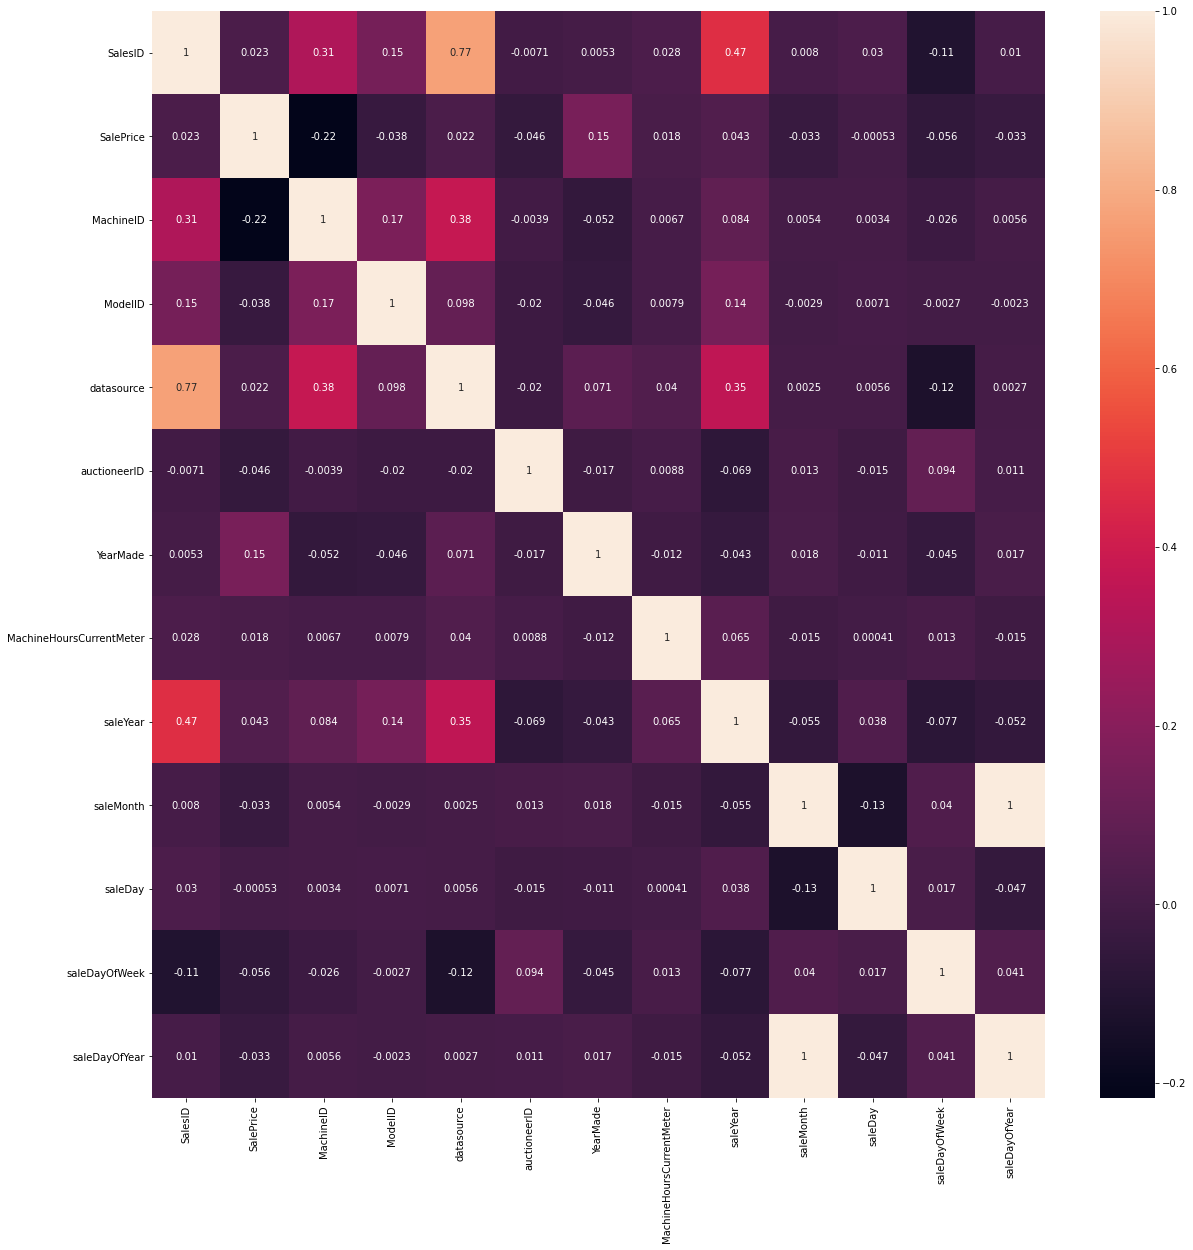

In [35]:
# Heat Map
# Plotting the dataset correlation heatmap
fig, ax = plt.subplots(figsize=(20,20))
ax =sns.heatmap(df_tmp.corr(), annot=True)
plt.show()


## Now we can do the last step before we feed our data to the model
* Transform the categorical columns to their respective assign categorical codes


In [36]:
# the last step
for label, content in df_model.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Tune categorical into numbers and add + 1
        df_model[label] = pd.Categorical(content).codes

df_model[list_str_columns]


,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,3,4592,1743,177,123,140,3,46,43,4,...,19,29,3,3,3,0,7,5,4,5
274835,3,1819,558,177,123,140,6,59,8,5,...,19,29,3,3,3,2,10,7,3,1
141296,3,2347,712,58,123,140,1,49,8,4,...,19,29,3,3,3,0,7,5,4,5
212552,3,1818,557,177,123,140,6,73,8,5,...,19,29,3,3,3,2,10,7,3,1
62755,3,2118,682,20,123,140,6,50,8,4,...,19,29,3,3,3,0,5,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,3,2100,689,49,123,140,6,52,4,4,...,19,29,3,3,3,0,5,5,4,5
412476,3,239,83,177,123,140,6,40,4,2,...,19,29,3,3,3,2,10,7,4,5
411927,3,626,202,58,123,140,4,22,4,3,...,19,29,3,3,3,2,10,7,4,5
407124,3,82,18,58,123,140,6,30,4,1,...,19,29,3,3,3,2,10,7,4,5


In [37]:
# check the whole model dataset
df_model



,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,3,0,...,0,7,5,4,5,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,3,1,...,2,10,7,3,1,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,3,1,...,0,7,5,4,5,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,3,1,...,2,10,7,3,1,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,3,1,...,0,5,4,4,5,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,0.0,3,4012,...,0,5,5,4,5,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,0.0,3,4012,...,2,10,7,4,5,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,0.0,3,4012,...,2,10,7,4,5,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,0.0,3,4012,...,2,10,7,4,5,2012,4,28,5,119


In [38]:
# check info()
# Perfect all numerical
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 412698 non-null  int8   
 9   saledate                  412698 non-null  int16  
 10  fiModelDesc               412698 non-null  int16  
 11  fiBaseModel               412698 non-null  int16  
 12  fiSecondaryDesc           412698 non-null  int16  
 13  fiModelSeries             412698 non-nu

In [39]:
# check describe
df_model.describe()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,412698.000000,412698.000000,4.126980e+05,412698.000000,412698.000000,...,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.361548,1899.049637,1.259165e+03,2.699453,2383.607885,...,1.608905,9.091280,6.539564,3.817486,4.305790,2004.317382,6.300268,16.152894,2.594338,176.784094
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,16.763713,292.190243,1.633077e+04,0.717638,1061.162929,...,0.793213,1.943329,1.012492,0.429650,1.516902,5.821090,3.437276,8.429510,1.417971,103.910718
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,0.000000,1.000000
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,3.000000,1578.000000,...,2.000000,10.000000,7.000000,4.000000,5.000000,2000.000000,3.000000,9.000000,2.000000,82.000000
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,3.000000,2575.000000,...,2.000000,10.000000,7.000000,4.000000,5.000000,2006.000000,6.000000,16.000000,3.000000,165.000000
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,0.000000e+00,3.000000,3240.000000,...,2.000000,10.000000,7.000000,4.000000,5.000000,2009.000000,9.000000,23.000000,3.000000,270.000000
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06,3.000000,4012.000000,...,2.000000,10.000000,7.000000,4.000000,5.000000,2012.000000,12.000000,31.000000,6.000000,365.000000


### Now Building the Model
* The y: dependent variable is the `SalePrice`
* `RandomForestRegressor` model is going to be used in this project
* Split the data to X and y
* Split the data to train and test set

### Now Building the Model
* The y: dependent variable is the `SalePrice`
* `RandomForestRegressor` model is going to be used in this project
* Split the data to X and y
* Split the data to train and test set

In [40]:
# Note we are using the df_model to do the split
X = df_model.drop("SalePrice", axis=1)
X

y = df_model["SalePrice"]
y

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
410879    16000.0
412476     6000.0
411927    16000.0
407124    55000.0
409203    34000.0
Name: SalePrice, Length: 412698, dtype: float64

In [41]:
# Import
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)



In [42]:
# check the shapes
print("X_tarin: ",X_train.shape)
print("y_train:",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)



X_tarin:  (330158, 57)
y_train: (330158,)
X_test:  (82540, 57)
y_test:  (82540,)


In [43]:
#  initiate the model
# n_jobs = -1 means use all processes
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

In [44]:
# fit the model to the train set
model.fit(X_train, y_train)



RandomForestRegressor(n_jobs=-1, random_state=42)

## Model Evaluation


In [45]:
# With the Train set
model.score(X_train,y_train)



0.9871553253821982

In [46]:
# With the test set
model.score(X_test,y_test)



0.9083239208329156

# Looks good so far but we can Evaluate the Model more

In [47]:
# import helpful Metrics for Regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score,mean_absolute_error

# Create a function for root mean squared log error RMSLE
def rmsle(y_test, y_preds):
    '''

    Calculate root mean squared log error between prediction and
    true labels
    '''

    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [48]:
# let's make predictions
y_preds = model.predict(X_test)
y_preds



array([ 5625.5, 14775. , 14162.5, ..., 20135. , 53620. ,  8798.5])

In [49]:
# let's create a dataframe between y_test/y_true and y_preds

pre_check=  pd.DataFrame({"Actual SalePrice": y_test,
                          "Predicted SalePrice":y_preds}).reset_index(drop=True)
pre_check

,Actual SalePrice,Predicted SalePrice
0,7500.0,5625.5
1,13500.0,14775.0
2,11000.0,14162.5
3,19000.0,15378.5
4,18000.0,23460.0
...,...,...
82535,90000.0,98020.0
82536,32000.0,20465.5
82537,21500.0,20135.0
82538,67500.0,53620.0


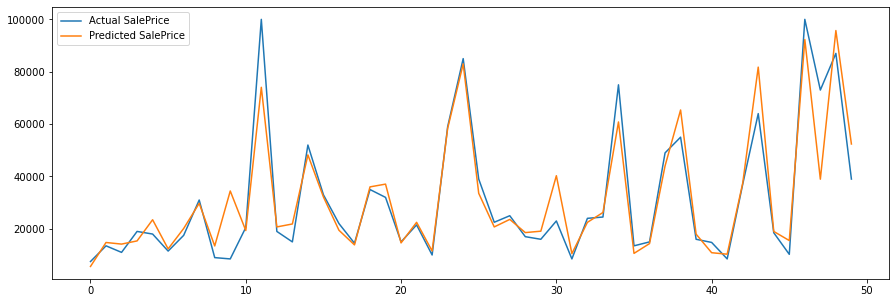

In [50]:
# Lets try to plot and see it clearly
# We have to slice the data as its a huge dataset
pre_check[:50].plot(kind="line",figsize=(15,5))
plt.show()



# From the above plot it shows the model is doing great.
Now we will use the other metrics


In [51]:
# We will create a fuction for the Metrics

def model_performace(y_true,y_preds):
    metrics = {
        "RMSLE SCORE: ": rmsle(y_true,y_preds),
        "MSE SCORE": mean_squared_error(y_true, y_preds),
        "MAE SCORE": mean_absolute_error(y_true, y_preds),
        "R-Square SCORE": r2_score(y_true, y_preds),

    }
    return metrics

performance = model_performace(y_test,y_preds)
performance

{'RMSLE SCORE: ': 0.2117749352035951,
 'MSE SCORE': 49130210.89227593,
 'MAE SCORE': 4338.439225442209,
 'R-Square SCORE': 0.9083239208329156}

## The model is doing great but we can improve it by:
Turning the hyperparameter using three methods:
* Manually by Hand
* Using RandomizedSearchCV
* Using GridSearchCV

**NOTE** Using the RandomizedSearchCV and GridSearchCV will take time and computer power to process this large dataset.



# The RMSLE on Kaggle Leaderboard
* link https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard

![title](score_book_bulldozers.PNG)


## Now We can check Features of Importance
Feature importance seeks to figure out which attributes of the data were more important in predicting the target variables(SalePrice)

In [52]:
# Find features importance of out best model
model.feature_importances_


array([4.72981931e-02, 1.57816073e-02, 7.50022826e-02, 6.34198652e-04,
       4.16714879e-03, 2.31997867e-01, 3.18360629e-03, 1.06496152e-03,
       8.46501977e-02, 2.18562059e-02, 8.38918798e-02, 1.88806693e-02,
       3.63616055e-03, 7.30035930e-03, 2.29547988e-01, 4.01824310e-02,
       7.99020181e-03, 3.34474075e-03, 2.45067426e-03, 1.14887719e-03,
       8.37371190e-03, 6.76192616e-04, 6.48063346e-05, 2.21036921e-03,
       1.56048611e-04, 6.52070280e-04, 5.98580508e-05, 1.14612633e-03,
       7.77132916e-04, 1.51286562e-03, 1.12377988e-03, 2.13489415e-03,
       1.17380058e-03, 5.12214174e-03, 4.87908225e-04, 1.06929593e-03,
       2.11323615e-02, 1.22844405e-03, 3.03091743e-02, 1.10656577e-05,
       8.70341156e-06, 5.49597424e-04, 1.50037282e-03, 1.46279363e-03,
       8.97244630e-04, 6.11889319e-04, 7.81205983e-04, 1.57743539e-04,
       1.72962625e-03, 1.94191038e-03, 1.70852410e-04, 2.36393235e-04,
       2.38361555e-03, 2.60610939e-03, 8.27577265e-03, 4.06820137e-03,
      

In [53]:
# Lets make a function so we can visualize the features
def plot_features(columns, feature_importances_, n):
    #  Create a dataframe
    df_features = (pd.DataFrame({"features": columns,
                                 "feature_importances": feature_importances_})
                   .sort_values(by="feature_importances", ascending=False)
                   .reset_index(drop=True))
    fig, ax = plt.subplots(figsize=(30,100))
    ax.barh(df_features["features"][:n], df_features["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features importance")
    # invert the y axis so top down by importance
    ax.invert_yaxis()
    plt.show()

    return df_features


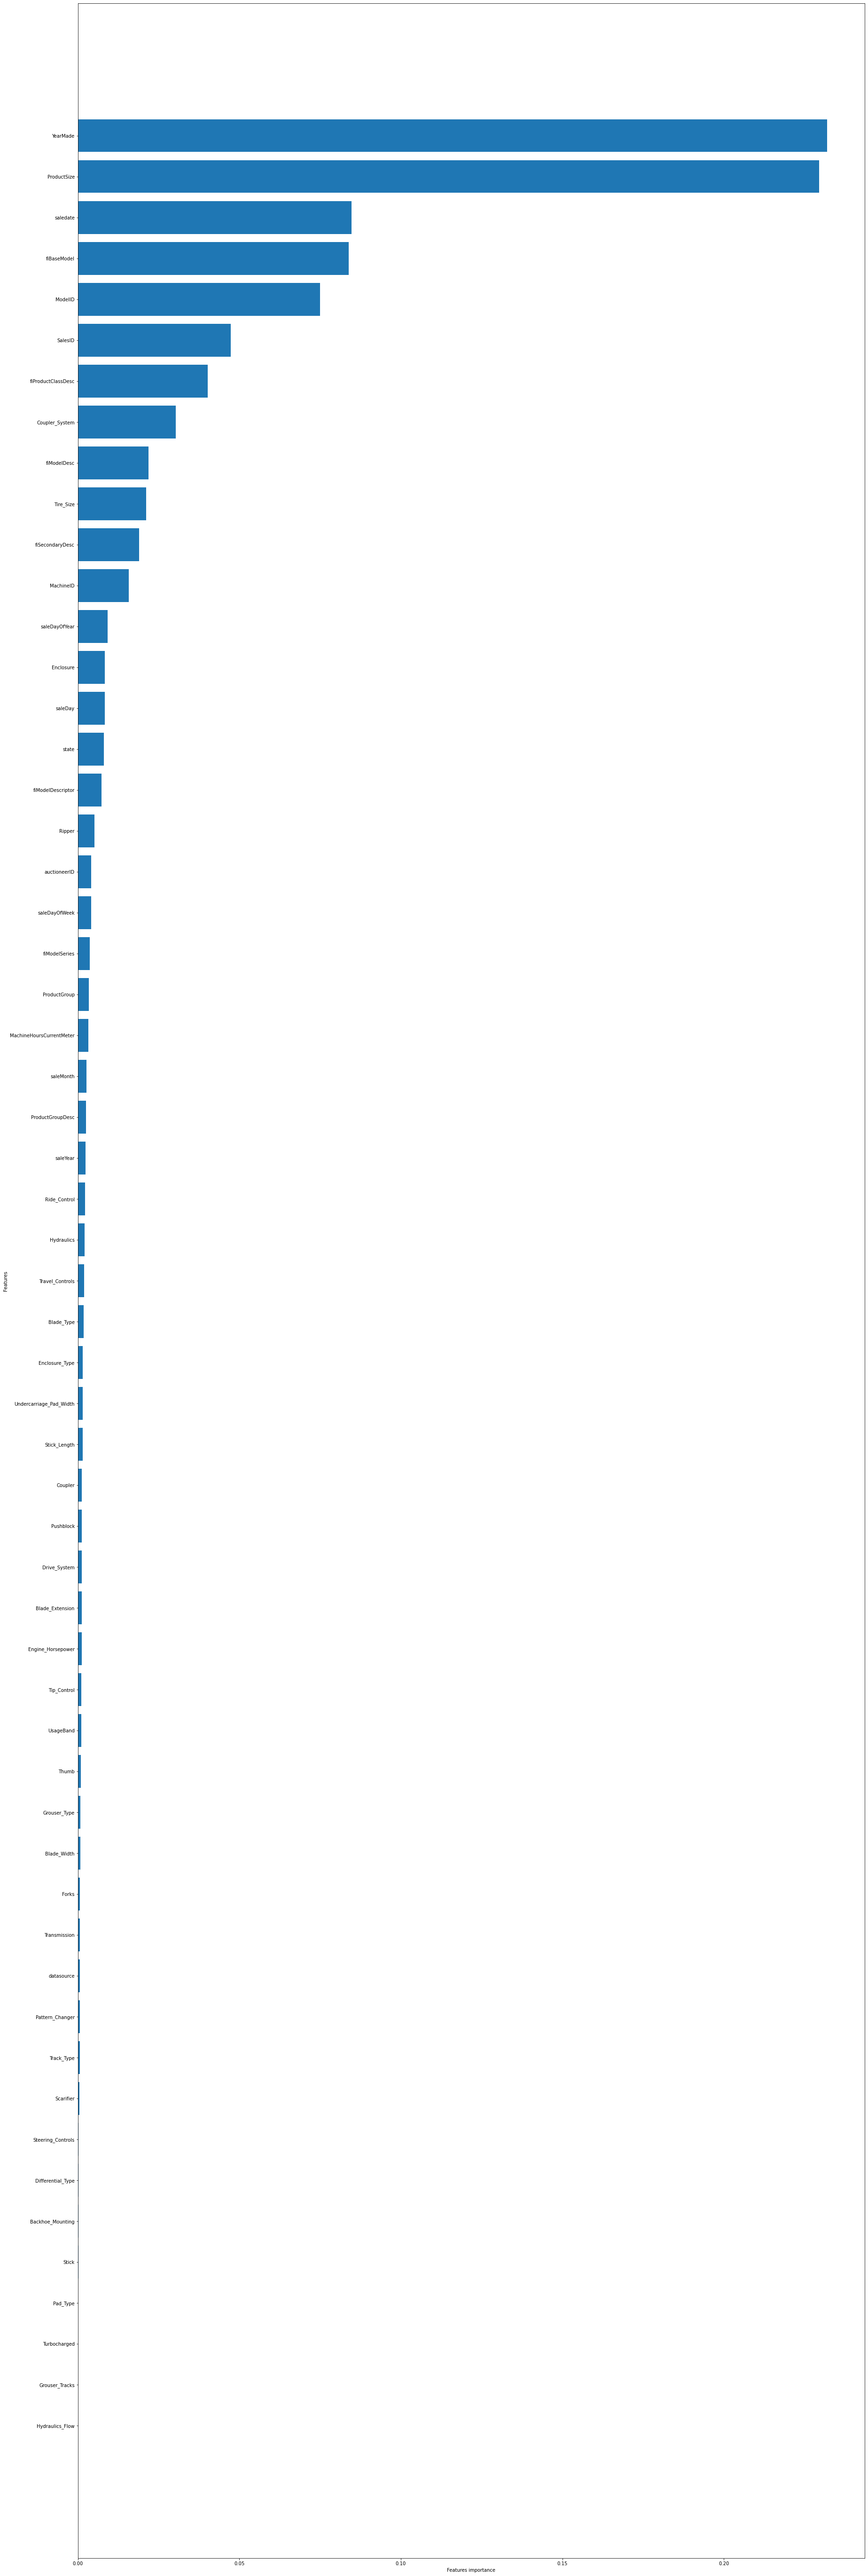

,features,feature_importances
0,YearMade,0.231998
1,ProductSize,0.229548
2,saledate,0.084650
3,fiBaseModel,0.083892
4,ModelID,0.075002
5,SalesID,0.047298
6,fiProductClassDesc,0.040182
7,Coupler_System,0.030309
8,fiModelDesc,0.021856
9,Tire_Size,0.021132


In [54]:
# Create a data frame and plot
df_features = plot_features(X_train.columns, model.feature_importances_,n=len(X_test))
df_features


In [55]:
# Feature of Importance Table
df_features

,features,feature_importances
0,YearMade,0.231998
1,ProductSize,0.229548
2,saledate,0.084650
3,fiBaseModel,0.083892
4,ModelID,0.075002
5,SalesID,0.047298
6,fiProductClassDesc,0.040182
7,Coupler_System,0.030309
8,fiModelDesc,0.021856
9,Tire_Size,0.021132


## We have reached the End of this Experimental Project.

From the Feature of Importance table above it shows the most importance feature that determines the Sale Price of the bulldozers is the `YearMade`.

This is very true if you have ever shopped for a New or second hand vehicle the year the vehicle was made `YearMade` is very important when in determining it's Price.

# What other machine learning model could you try:
* check the regression of this map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
OR
* CatBoost.ai
* XGBooost.ai




# What other machine learning model could you try:
* check the regression of this map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
OR
* CatBoost.ai
* XGBooost.ai


